In [1]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import pandas as pd
import seaborn as sns
from numpy import mean

## Generate mmscores csv

In [7]:
#mcts3_dir = "/home/hychimaa/workspace/molpc_imp/result/mcts_result/mcts_v4_tmscores/*"
mcts3_dir = "/home/hychimaa/workspace/molpc-imp/analysis/pdbs/molpc2_tmscores/*"

lst = []

for p in glob.glob(mcts3_dir):
    with open(p) as f:
        lines = f.readlines()
        score = lines[1].split("\t")[2]
        lst.append(f'{os.path.basename(p)[0:4]},{score}')

with open('mmalign_molpc2.csv', 'w') as f:
    for line in lst:
        f.write(f"{line}\n")

## Dataset

In [2]:
meta = pd.read_csv('stochiometry.csv')
imp = pd.read_csv('mmalign_imp.csv')
molpc = pd.read_csv('mmalign_molpc_v2.csv')
mcts_v2 = pd.read_csv('mmalign_mcts_v2.csv')
mcts_v2_2 = pd.read_csv('mmalign_mcts_v2.2.csv')
af = pd.read_csv('mmalign_af2.csv')
mcts_v3 = pd.read_csv('mmalign_mcts_v3.csv')
mcts_v4 = pd.read_csv('mmalign_mcts_v4.csv')
final = pd.read_csv('mmalign_molpc2.csv')

In [5]:
meta[meta['no. of chains']==12]['symmetry type'].value_counts()

dihedral       21
tetrahedral    16
cyclic         12
asymmetric      8
Name: symmetry type, dtype: int64

In [71]:
chains_freq = pd.DataFrame({'10':[38, 13, 4, 0, 0, 1],
                            '11':[0, 5, 3, 0, 0, 0],
                            '12':[21, 12, 8, 16, 0, 0],
                            '13':[0, 2, 0, 0, 0, 1],
                            '14':[7, 6, 2, 0, 0, 0],
                            '15':[0, 1, 1, 0, 0, 0],
                            '16':[2, 2, 0, 0, 0, 0],
                            '17':[0, 0, 0, 0, 0, 0],
                            '18':[0, 1, 2, 0, 0, 1],
                            '19':[0, 0, 0, 0, 0, 0],
                            '20':[2, 1, 1, 0, 0, 0],
                            '21':[0, 1, 0, 0, 0, 0],
                            '22':[0, 0, 1, 0, 0, 0],
                            '23':[0, 0, 1, 0, 0, 0],
                            '24':[1, 2, 0, 5, 6, 0],
                            '25':[0, 0, 0, 0, 0, 0],
                            '26':[0, 0, 0, 0, 0, 0],
                            '27':[0, 0, 0, 0, 0, 0],
                            '28':[0, 2, 0, 0, 0, 0],
                            '29':[0, 0, 2, 0, 0, 0],
                            '30':[0, 1, 0, 0, 0, 0],},
                            index=['dihedral', 'cyclic', 'asymmetric', 'tetrahedral', 'octahedral', 'helical']
)

Text(0.5, 0, 'Number of chains')

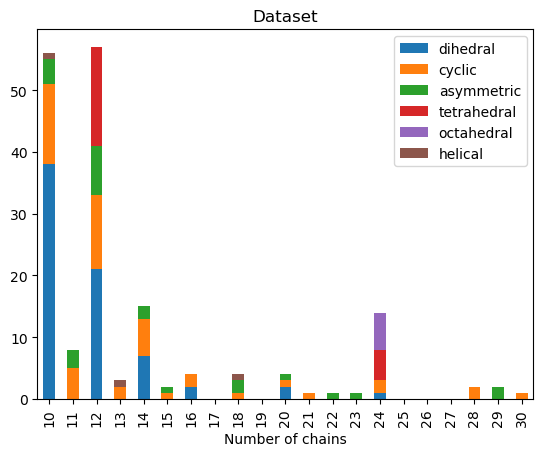

In [75]:
chains_freq.transpose().plot(kind='bar', stacked=True)
plt.title('Dataset')
plt.xlabel('Number of chains')

In [4]:
meta["symmetry type"].unique()
meta['symmetry type'].value_counts()

dihedral       71
cyclic         49
asymmetric     25
tetrahedral    21
octahedral      6
helical         3
Name: symmetry type, dtype: int64

## MoLPC-imp

In [3]:
#meta = pd.merge(meta, imp, how='outer', on='id')
meta = pd.merge(meta, molpc, how='outer', on='id')
meta = pd.merge(meta, mcts_v2, how='outer', on='id')
meta = pd.merge(meta, mcts_v2_2, how='outer', on='id')
meta = pd.merge(meta, mcts_v3, how='outer', on='id')
meta = pd.merge(meta, mcts_v4, how='outer', on='id')
meta = pd.merge(meta, final, how='outer', on='id')
meta = pd.merge(meta, af, how='outer', on='id')

In [12]:
meta[meta['Symmetry'] == 'octahedral']['tm_molpc2']

2      0.8420
26     0.9811
86     0.7724
123    0.1550
128    0.9138
137    0.6065
Name: tm_molpc2, dtype: float64

In [49]:
meta.to_csv('meta.csv', index=False)

In [101]:
index_lst = meta[meta['no. of individual chains']<=3].index.tolist()
pdb_lst = meta[meta['no. of individual chains']<=3]['id'].tolist()

In [5]:
meta2 = meta.dropna(subset=['tm_mcts_v2'])

dihe = meta2[meta2['symmetry'] == 'dihedral']
cycl = meta2[meta2['symmetry'] == 'cyclic']
asym = meta2[meta2['symmetry'] == 'asymmetric']
tetr = meta2[meta2['symmetry'] == 'tetrahedral']
octa = meta2[meta2['symmetry'] == 'octahedral']
heli = meta2[meta2['symmetry'] == 'helical']

In [ ]:
vp = sns.violinplot(data=meta, x='Symmetry', y='tm_molpc2', cut=0, ).set(title='MoLPC2')
sns.despine(bottom = False, left = False)

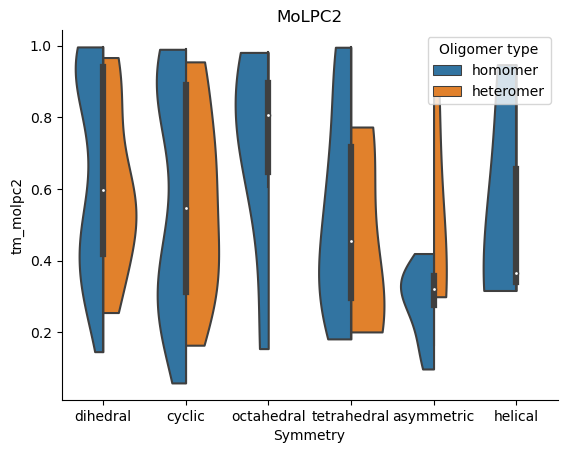

In [34]:
vp = sns.violinplot(data=meta, x='Symmetry', y='tm_molpc2', hue="Oligomer type",
               split=True, cut=0, ).set(title='MoLPC2')
sns.despine(bottom = False, left = False)

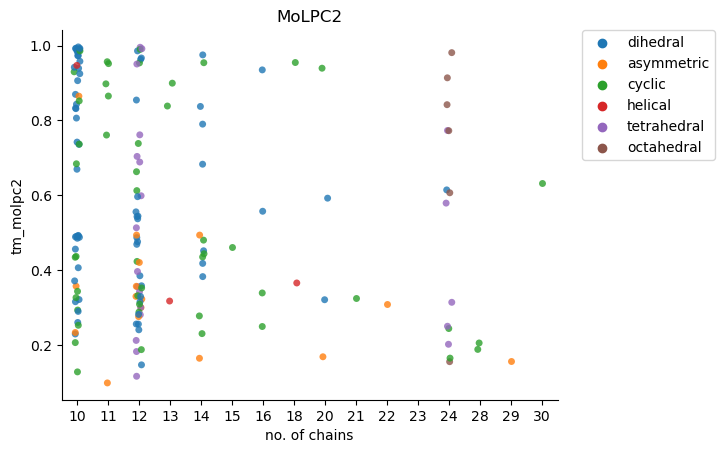

In [13]:
m=meta.groupby('no. of chains')['tm_molpc2'].mean()

sns.stripplot(data=meta, x='no. of chains', y='tm_molpc2', hue='Symmetry', alpha=.8).set(title='MoLPC2')
#sns.lineplot(x=m.index, y=m.values, err_style=None)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
sns.despine(bottom = False, left = False)

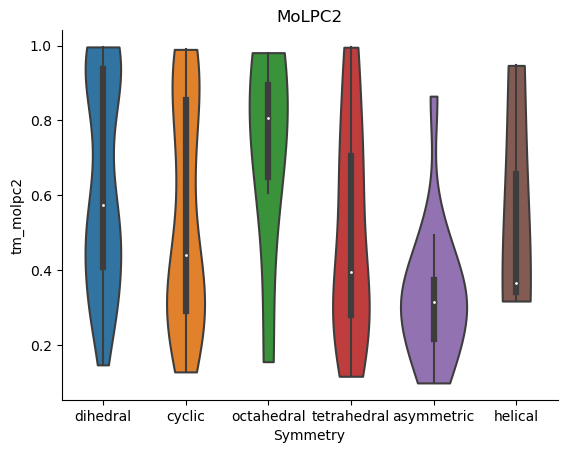

In [11]:
vp = sns.violinplot(data=meta, x='Symmetry', y='tm_molpc2', cut=0, estimator=mean).set(title='MoLPC2')
sns.despine(bottom = False, left = False)

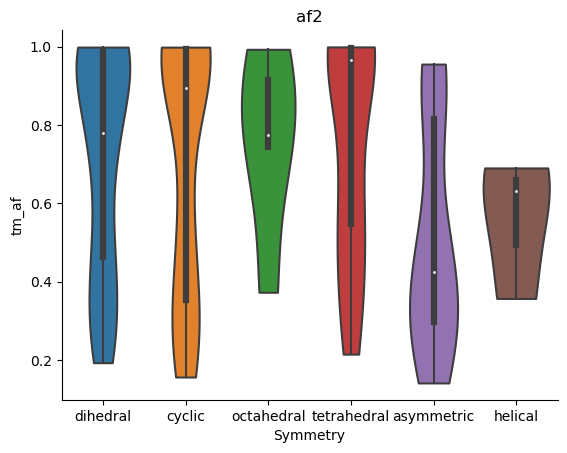

In [26]:
vp = sns.violinplot(data=meta, x='Symmetry', y='tm_af', cut=0).set(title='af2')
sns.despine(bottom = False, left = False)

## Correlation

In [22]:
imp_tmscores = imp['tm_imp'].to_list()
molpc_tmscores = molpc['tm_molpc'].to_list()
mcts_tmscores = mcts_v2['tm_mcts_v2'].to_list()
mcts2_tmscores = mcts_v2_2['tm_mcts_v2.2'].to_list()
af_tmscores = af['tm_af'].to_list()

In [9]:
comb = pd.merge(mcts_v3, mcts_v4, on='id', how='outer')
comb = pd.merge(comb, molpc, on='id', how='outer')
comb = pd.merge(comb, final, on='id', how='outer')
comb = pd.merge(comb, af, on='id', how='outer')
comb2 = comb.dropna()

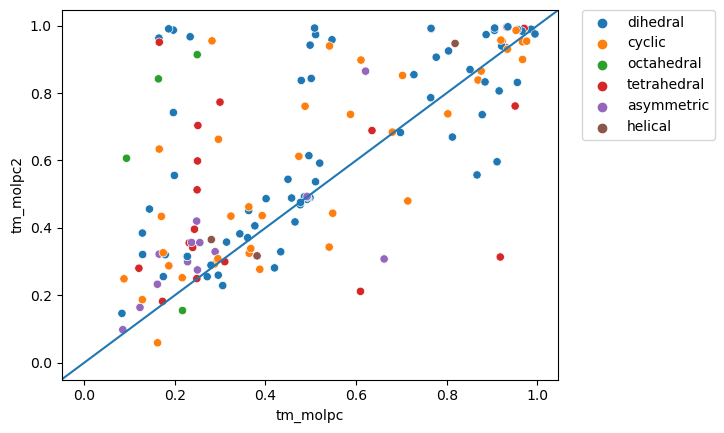

In [4]:
sns.scatterplot(data=meta, x="tm_molpc", y="tm_molpc2", hue="Symmetry")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axline((0, 0), slope=1)

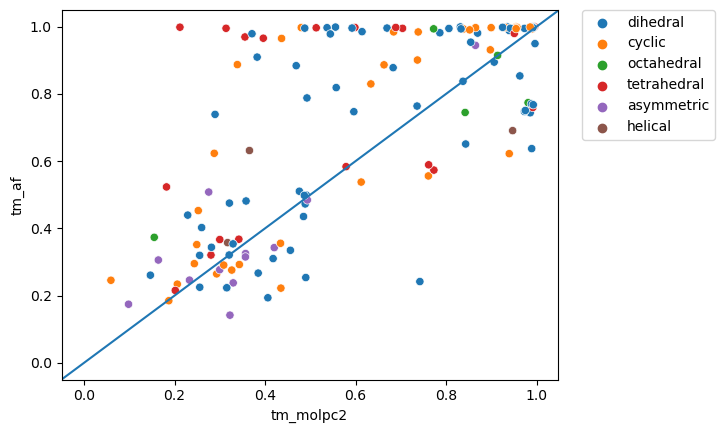

In [6]:
sns.scatterplot(data=meta, x="tm_molpc2", y="tm_af", hue="Symmetry")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.axline((0, 0), slope=1)

Text(0, 0.5, 'MoLPC2')

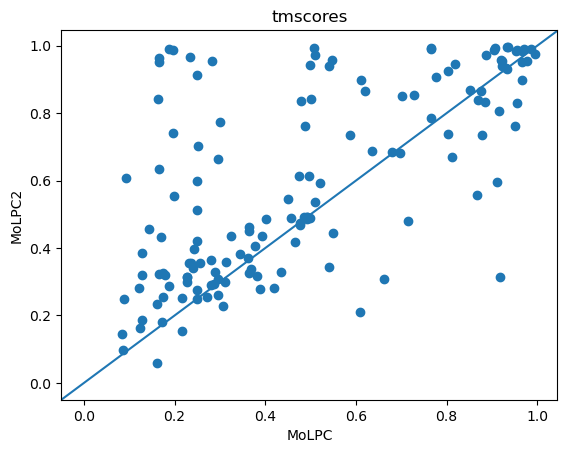

In [13]:
plt.scatter(meta['tm_molpc'].to_list(), meta['tm_molpc2'].to_list())
plt.axline((0, 0), slope=1)
plt.title("tmscores")
plt.xlabel('MoLPC')
plt.ylabel('MoLPC2')

Text(0, 0.5, 'MoLPC2')

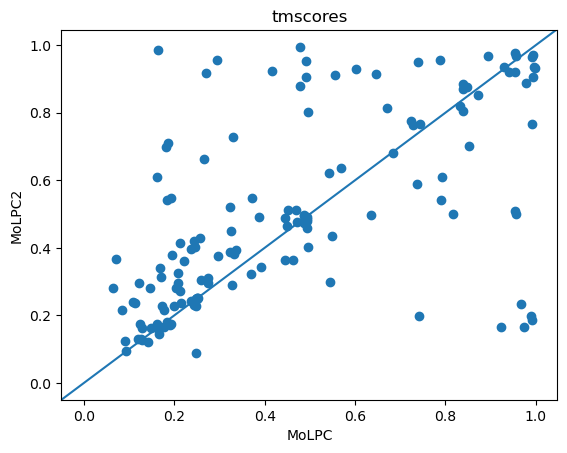

In [53]:
plt.scatter(meta['tm_mcts_v2'].to_list(), meta['tm_molpc'].to_list())
plt.axline((0, 0), slope=1)
plt.title("tmscores")
plt.xlabel('MoLPC')
plt.ylabel('MoLPC2')

In [18]:
comb2

,id,tm_molpc,tm_mcts_v2.2,tm_af
1,6UIW,0.6108,0.7863,0.9309
2,5K2M,0.4918,0.4934,0.4844
3,1G63,0.2510,0.2518,0.9949
4,3ZIA,0.5011,0.8432,0.6508
5,2P1B,0.4917,0.4924,0.4351
...,...,...,...,...
159,2DD4,0.5106,0.4699,0.9968
160,5CW7,0.3677,0.2023,0.8870
161,3K6C,0.8869,0.9732,0.9947
166,5ODC,0.8024,0.7383,0.9841


In [18]:
comb2 = meta.dropna()

In [17]:
print('molpc len:', len(meta['tm_molpc'].dropna().to_list()))
print('molpc2 len:', len(meta['tm_molpc2'].dropna().to_list()))
print('af len:', len(meta['tm_af'].dropna().to_list()))

molpc len: 168
molpc2 len: 153
af len: 157


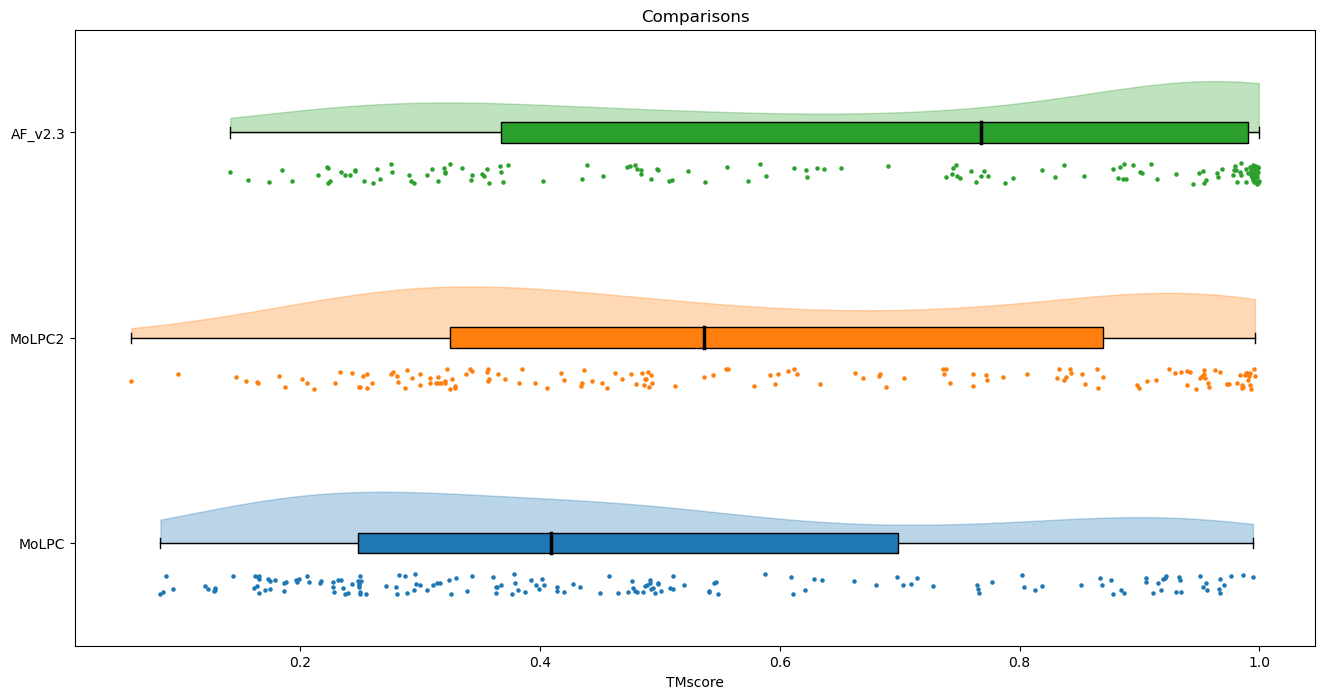

In [33]:
data_x = [meta['tm_molpc'].dropna().to_list(), meta['tm_molpc2'].dropna().to_list(), meta['tm_af'].dropna().to_list()]

fig, ax = plt.subplots(figsize=(16, 8))
# Create a list of colors for the boxplots based on the number of features you have

# default color: ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
medianprops = dict(linestyle='-', linewidth=2.5, color='black')
boxplots_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
#boxplots_colors = ['yellowgreen', 'olivedrab']
# Boxplot data
bp = ax.boxplot(data_x, patch_artist = True, vert = False, widths=0.1, medianprops=medianprops)
# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    plt.setp(bp['means'], color='k')
    patch.set_alpha(1)
# Create a list of colors for the violin plots based on the number of features you have
violin_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
# violin_colors = ['thistle', 'orchid']
# Violinplot data
vp = ax.violinplot(data_x, points=500, 
            showmeans=False, showextrema=False, showmedians=False, vert=False)
for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(violin_colors[idx])
# Create a list of colors for the scatter plots based on the number of features you have
scatter_colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
# Scatterplot data
for idx, features in enumerate(data_x):
    # Add jitter effect so the features do not overlap on the y-axis
    y = np.full(len(features), idx + .8)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.05, high=.05, size=len(idxs))
    y = out
    plt.scatter(features, y, s=5, c=scatter_colors[idx])
plt.yticks(np.arange(1,4,1), ['MoLPC', 'MoLPC2', 'AF_v2.3'])  # Set text labels.
plt.xlabel('TMscore')
plt.title("Comparisons")
plt.show()

In [59]:
np.mean(meta['tm_molpc'].dropna().to_list())

0.47489821428571427

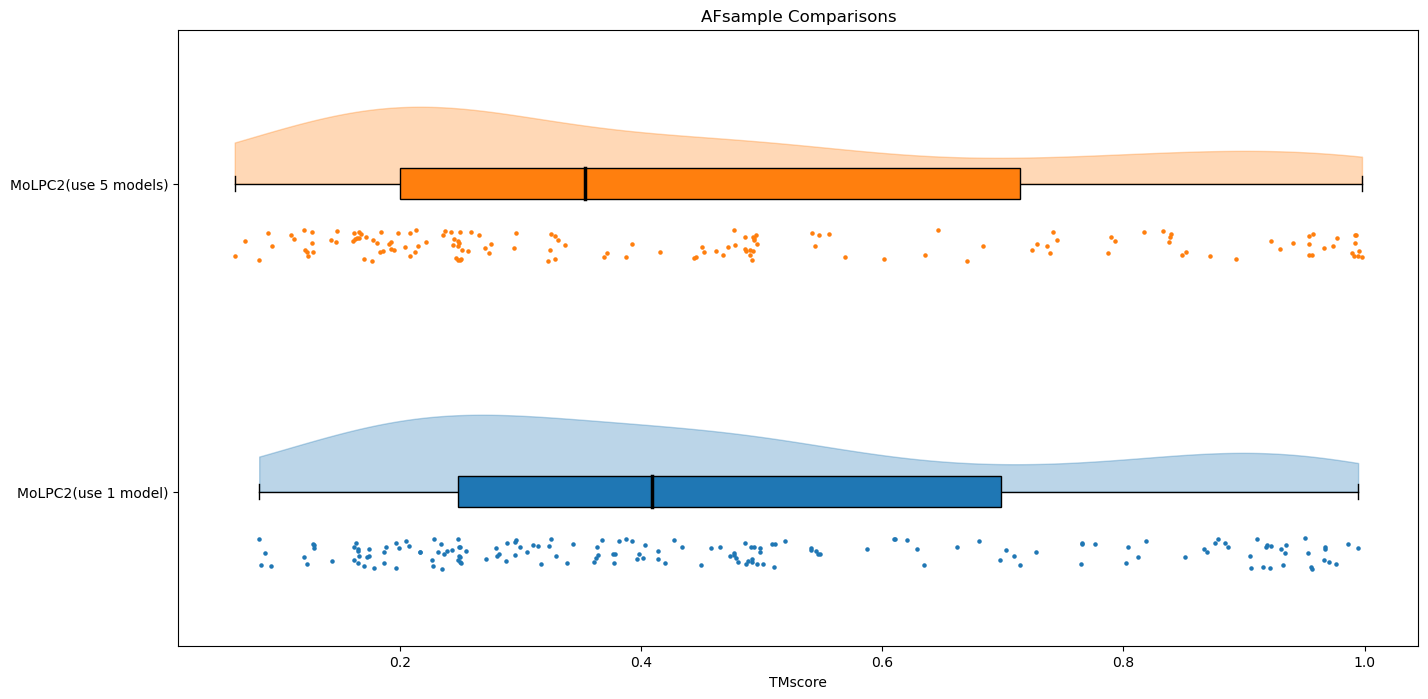

In [17]:
data_x = [meta['tm_molpc'].dropna().to_list(), meta['tm_mcts_v2'].dropna().to_list()]

fig, ax = plt.subplots(figsize=(16, 8))
# Create a list of colors for the boxplots based on the number of features you have

# default color: ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
medianprops = dict(linestyle='-', linewidth=2.5, color='black')
meanprops = dict(linestyle='-', linewidth=2.5, color='black')

boxplots_colors = ['#1f77b4', '#ff7f0e']
#boxplots_colors = ['yellowgreen', 'olivedrab']
# Boxplot data
bp = ax.boxplot(data_x, patch_artist = True, vert = False, widths=0.1, medianprops=medianprops)
# Change to the desired color and add transparency
for patch, color in zip(bp['boxes'], boxplots_colors):
    patch.set_facecolor(color)
    plt.setp(bp['means'], color='k')
    patch.set_alpha(1)
# Create a list of colors for the violin plots based on the number of features you have
violin_colors = ['#1f77b4', '#ff7f0e']
# violin_colors = ['thistle', 'orchid']
# Violinplot data
vp = ax.violinplot(data_x, points=500, 
            showmeans=False, showextrema=False, showmedians=False, vert=False)
for idx, b in enumerate(vp['bodies']):
    # Get the center of the plot
    m = np.mean(b.get_paths()[0].vertices[:, 0])
    # Modify it so we only see the upper half of the violin plot
    b.get_paths()[0].vertices[:, 1] = np.clip(b.get_paths()[0].vertices[:, 1], idx+1, idx+2)
    # Change to the desired color
    b.set_color(violin_colors[idx])
# Create a list of colors for the scatter plots based on the number of features you have
scatter_colors = ['#1f77b4', '#ff7f0e']
# Scatterplot data
for idx, features in enumerate(data_x):
    # Add jitter effect so the features do not overlap on the y-axis
    y = np.full(len(features), idx + .8)
    idxs = np.arange(len(y))
    out = y.astype(float)
    out.flat[idxs] += np.random.uniform(low=-.05, high=.05, size=len(idxs))
    y = out
    plt.scatter(features, y, s=5, c=scatter_colors[idx])
plt.yticks(np.arange(1,3,1), ['MoLPC', 'MoLPC2 wit'])  # Set text labels.
plt.xlabel('TMscore')
plt.title("AFsample Comparisons")
plt.show()

In [83]:
pd.read_csv('all.csv').sort_values(by=['tm_mcts_v2.2', 'tm_mcts_v2'], ascending=False).to_csv('order.csv', index=False)